## Exploratory Data Analysis for all Data Roles

In [2]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
datasets = load_dataset('lukebarousse/data_jobs')
df = datasets['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skl_lst: ast.literal_eval(skl_lst) if pd.notna(skl_lst) else skl_lst )

### Roles to Explore

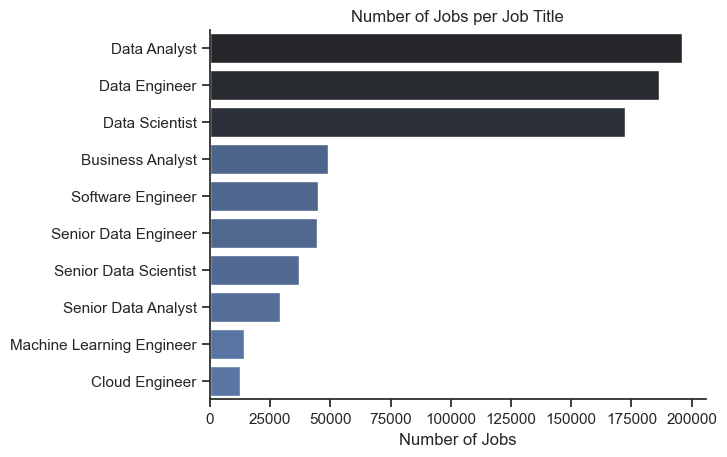

In [4]:
df_plot = df['job_title_short'].value_counts().to_frame().copy()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Countries to Explore

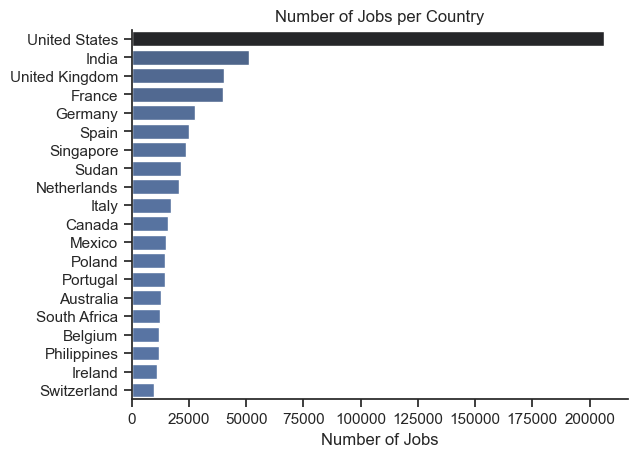

In [10]:
df_plot = df['job_country'].value_counts().to_frame().head(20).copy()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

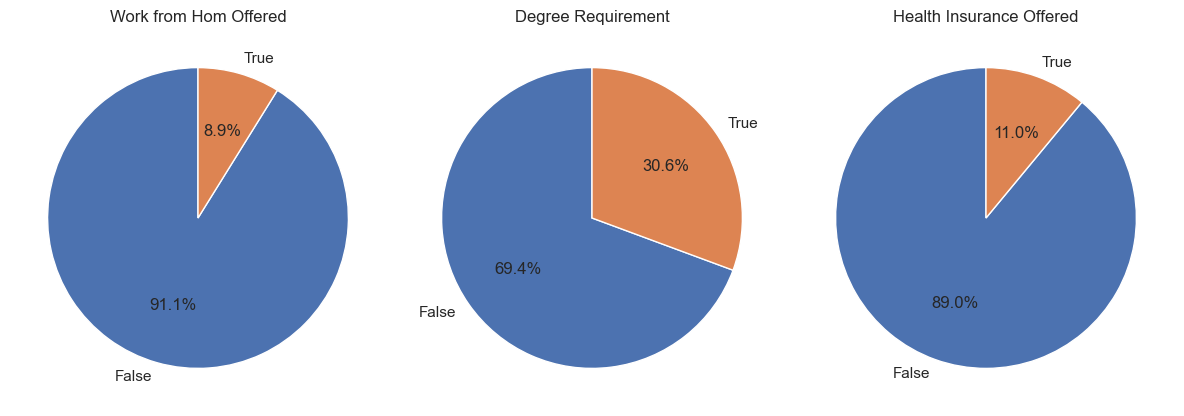

In [21]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))


plt.subplot(1, 3, 1)
plt.pie(df.job_work_from_home.value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Work from Hom Offered')


plt.subplot(1, 3, 2)
plt.pie(df.job_no_degree_mention.value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Degree Requirement')


plt.subplot(1, 3, 3)
plt.pie(df.job_health_insurance.value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Health Insurance Offered')

plt.tight_layout()
plt.show()


## Exploratory Data Analysis for Data Analyst Roles in India

### Filter for India Data Analyst Role

In [114]:
df_india = df[(df.job_country == 'India') & (df.job_title_short == 'Data Analyst')].copy()

### Locations to Explore

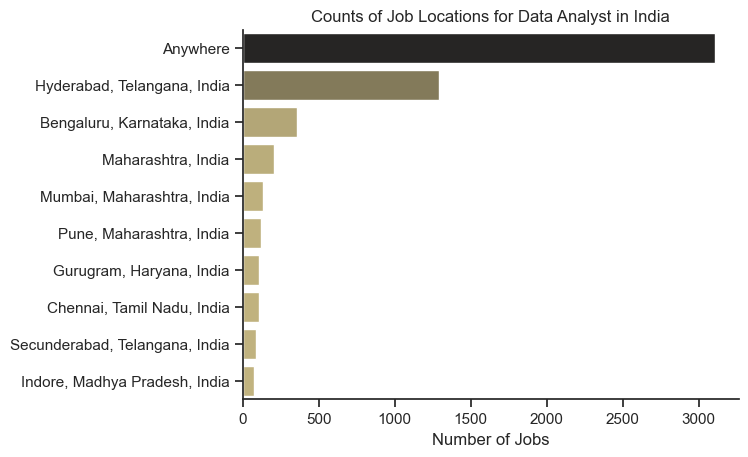

In [208]:
df_plot = df_india['job_location'].value_counts().head(11)
df_plot.iloc[2] = df_plot.iloc[2]+df_plot.iloc[0]
df_plot.drop(index='India',inplace=True)
df_plot = pd.DataFrame(df_plot)
df_plot.sort_values(by='count', ascending=False,inplace=True)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:y_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

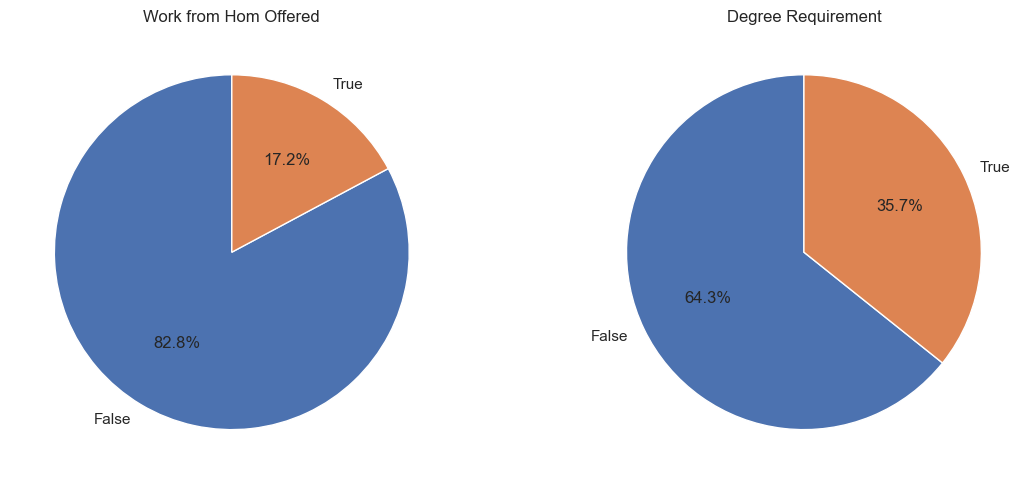

In [115]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))


plt.subplot(1, 2, 1)
plt.pie(df_india.job_work_from_home.value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Work from Hom Offered')


plt.subplot(1, 2, 2)
plt.pie(df_india.job_no_degree_mention.value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Degree Requirement')

plt.tight_layout()
plt.show()

### Companies to Explore

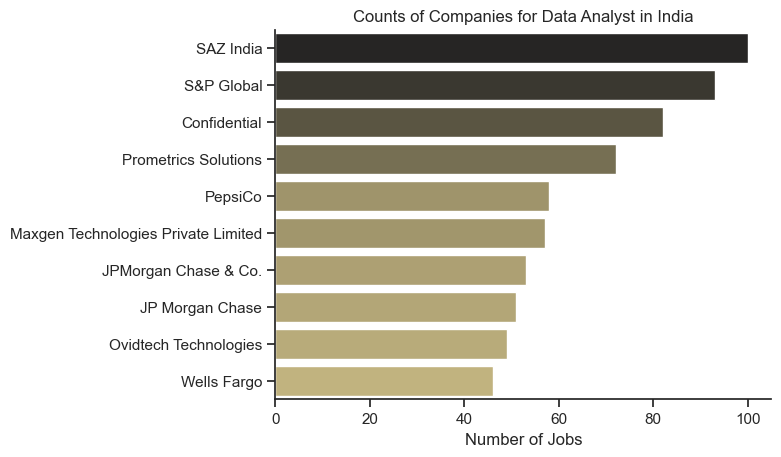

In [207]:
df_plot = df_india['company_name'].value_counts().to_frame().head(10).copy()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:y_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()